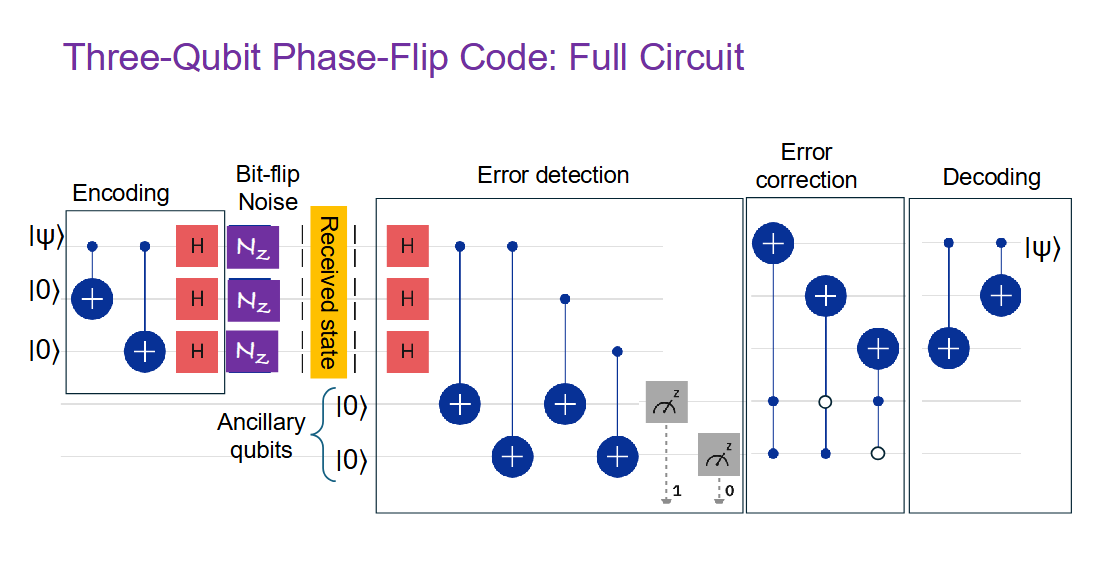

In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector 
from qiskit.circuit.library import MCXGate

initial state:


<IPython.core.display.Latex object>

Prepared state:


<IPython.core.display.Latex object>

After encoding:


<IPython.core.display.Latex object>

After bit flip error:


<IPython.core.display.Latex object>

After bit flip error detection:


<IPython.core.display.Latex object>

After bit flip error correction:


<IPython.core.display.Latex object>

After decoding:


<IPython.core.display.Latex object>

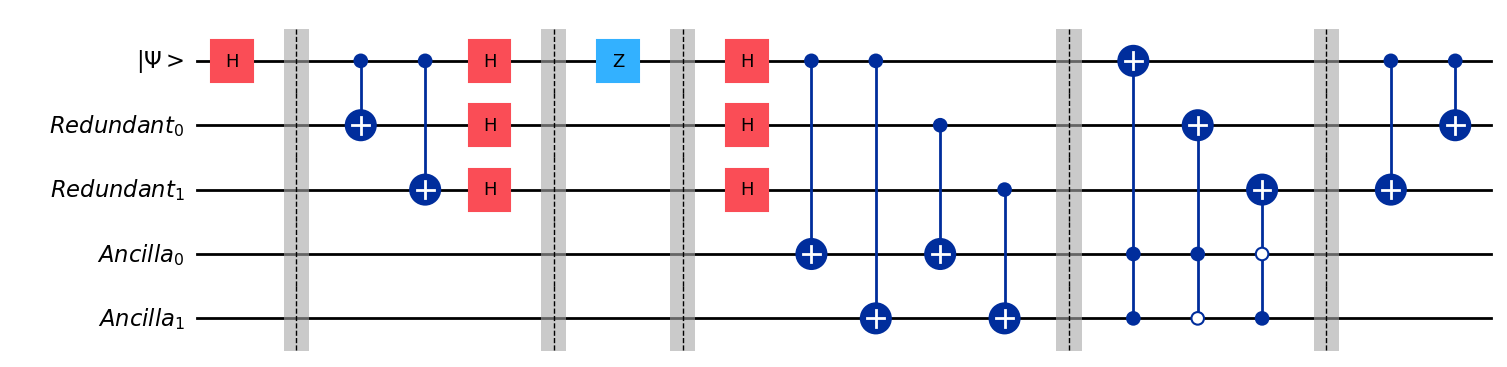

In [3]:
psi = QuantumRegister(1, '|Ψ>')
redundant = QuantumRegister(2, 'Redundant')
ancicall = QuantumRegister(2, 'Ancilla')

Qc = QuantumCircuit(psi, redundant, ancicall)

psi = Statevector(Qc)
print("initial state:")
display(psi.draw('Latex'))

#state preparation
Qc.h(0)
psi = Statevector(Qc)
print("Prepared state:")
display(psi.draw('Latex'))

Qc.barrier()

#encoding
Qc.cx(0,1)
Qc.cx(0,2)
Qc.h([0,1,2])

psi = Statevector(Qc)
print("After encoding:")
display(psi.draw('Latex'))

Qc.barrier()

#Phase flip error happens on qubit 0
Qc.z(0)

psi = Statevector(Qc)
print("After bit flip error:")
display(psi.draw('Latex'))

Qc.barrier()
#error detection

Qc.h([0,1,2])
Qc.cx(0,3)
Qc.cx(0,4)
Qc.cx(1,3)
Qc.cx(2,4)

psi = Statevector(Qc)
print("After bit flip error detection:")
display(psi.draw('Latex'))

Qc.barrier()
#correction
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='11'), [3, 4, 0])
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='01'), [3, 4, 1])
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='10'), [3, 4, 2])

psi = Statevector(Qc)
print("After bit flip error correction:")
display(psi.draw('Latex'))

Qc.barrier()
#decoding
Qc.cx(0,2)
Qc.cx(0,1)

psi = Statevector(Qc)
print("After decoding:")
display(psi.draw('Latex'))

Qc.draw('mpl')